# Wine Quality Problem

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 5-6/winequality-data.csv")

In [3]:
# list down the sample data

data.sample(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
3572,7.1,0.25,0.31,2.3,0.050,32.0,156.0,0.99140,3.14,0.51,11.4,6,4553
1983,8.3,0.40,0.41,8.2,0.050,15.0,122.0,0.99790,3.39,0.49,9.3,5,2964
804,6.2,0.16,0.54,1.4,0.126,37.0,110.0,0.99320,3.23,0.37,8.9,6,1785
3799,6.4,0.26,0.26,1.1,0.052,22.0,176.0,0.99304,3.09,0.54,9.3,5,4780
2455,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,7,3436
3876,5.9,0.22,0.29,4.2,0.037,69.0,144.0,0.99214,3.13,0.74,10.8,7,4857
408,6.0,0.39,0.17,12.0,0.046,65.0,246.0,0.99760,3.15,0.38,9.0,6,1389
1031,6.6,0.25,0.30,14.4,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,6,2012
1251,6.5,0.23,0.39,1.9,0.036,41.0,98.0,0.99000,3.19,0.43,11.9,7,2232
2394,6.5,0.24,0.38,1.0,0.027,31.0,90.0,0.98926,3.24,0.36,12.3,6,3375


In [4]:
#checking the info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
fixed.acidity           3918 non-null float64
volatile.acidity        3918 non-null float64
citric.acid             3918 non-null float64
residual.sugar          3918 non-null float64
chlorides               3918 non-null float64
free.sulfur.dioxide     3918 non-null float64
total.sulfur.dioxide    3918 non-null float64
density                 3918 non-null float64
pH                      3918 non-null float64
sulphates               3918 non-null float64
alcohol                 3918 non-null float64
quality                 3918 non-null int64
id                      3918 non-null int64
dtypes: float64(11), int64(2)
memory usage: 398.0 KB


In [5]:
#checking the missing values

data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

In [6]:
# Since ID feature is only used for the submission and not such useful for the model, we can drop it

data = data.iloc[:,:-1]
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


In [7]:
# Statistical Analysis

data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000


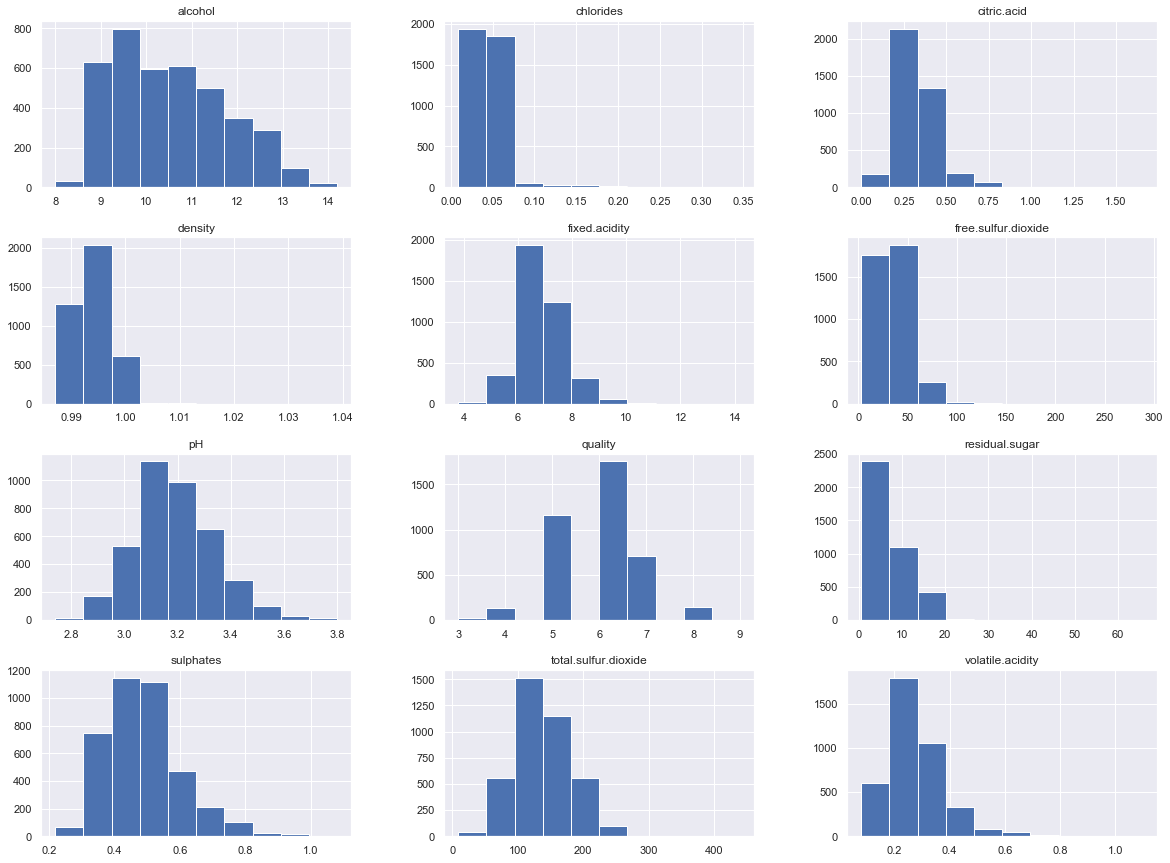

In [8]:
# Univariate analysis

data.hist(figsize=(20,15))
plt.show()

In [9]:
# check the correlation between the target and the features

correlation = data.corr()
correlation

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.018244,0.297831,0.093249,0.017633,-0.057874,0.079012,0.267259,-0.431066,-0.011915,-0.126329,-0.111060
volatile.acidity,-0.018244,1.000000,-0.140043,0.077979,0.069602,-0.096284,0.088366,0.033974,-0.045407,-0.032703,0.071912,-0.189113
citric.acid,0.297831,-0.140043,1.000000,0.106384,0.109368,0.088143,0.114861,0.157975,-0.165478,0.059628,-0.077949,-0.008064
residual.sugar,0.093249,0.077979,0.106384,1.000000,0.096991,0.303088,0.411613,0.842294,-0.199808,-0.012444,-0.453181,-0.101570
chlorides,0.017633,0.069602,0.109368,0.096991,1.000000,0.101693,0.195431,0.260935,-0.086290,0.014115,-0.363394,-0.214543
free.sulfur.dioxide,-0.057874,-0.096284,0.088143,0.303088,0.101693,1.000000,0.623179,0.294149,0.004650,0.063534,-0.250605,0.002892
total.sulfur.dioxide,0.079012,0.088366,0.114861,0.411613,0.195431,0.623179,1.000000,0.532155,0.002910,0.143494,-0.451141,-0.177076
density,0.267259,0.033974,0.157975,0.842294,0.260935,0.294149,0.532155,1.000000,-0.101704,0.080072,-0.778263,-0.313763
pH,-0.431066,-0.045407,-0.165478,-0.199808,-0.086290,0.004650,0.002910,-0.101704,1.000000,0.151962,0.123085,0.097981
sulphates,-0.011915,-0.032703,0.059628,-0.012444,0.014115,0.063534,0.143494,0.080072,0.151962,1.000000,-0.010429,0.053632


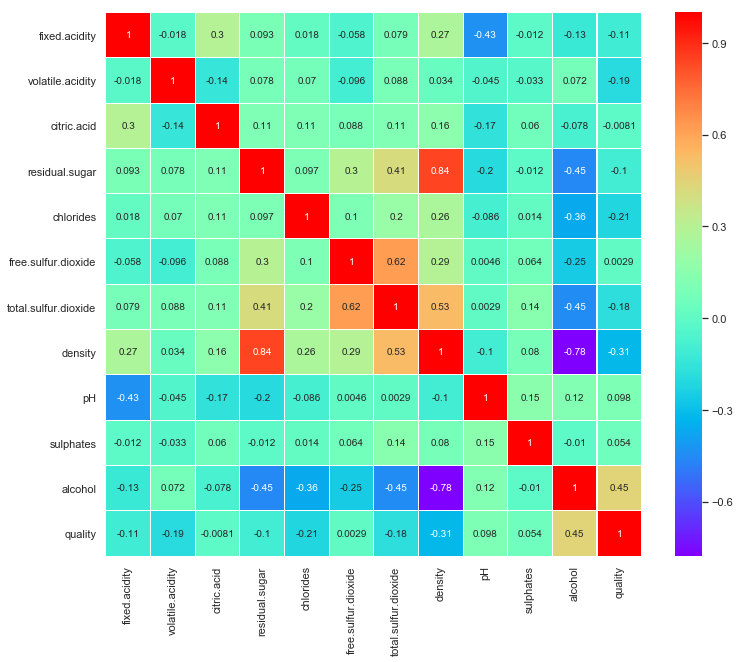

In [10]:
#create heatmap to see whats the magnitude of the correlaton between target and other variables

plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,cmap='rainbow',linewidths=0.1,linecolor='w')

In [11]:
# arrange the magnitude of correlation with the target variable in descending order.

a=correlation['quality'].sort_values(ascending=False)
print(a,"\n")
print (r"Since the features alochol, chlorides and density are the most prominent feature affecting the target variable")

quality                 1.000000
alcohol                 0.450069
pH                      0.097981
sulphates               0.053632
free.sulfur.dioxide     0.002892
citric.acid            -0.008064
residual.sugar         -0.101570
fixed.acidity          -0.111060
total.sulfur.dioxide   -0.177076
volatile.acidity       -0.189113
chlorides              -0.214543
density                -0.313763
Name: quality, dtype: float64 

Since the features alochol, chlorides and density are the most prominent feature affecting the target variable


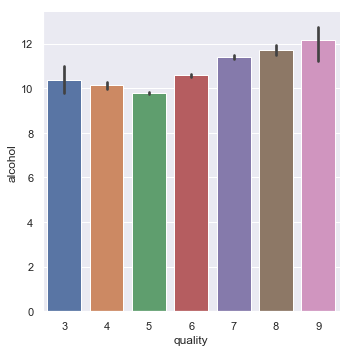

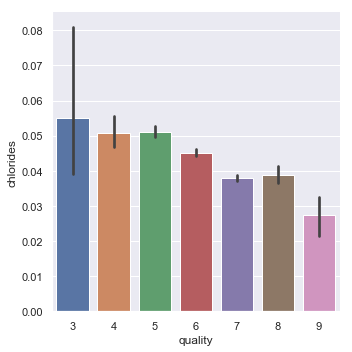

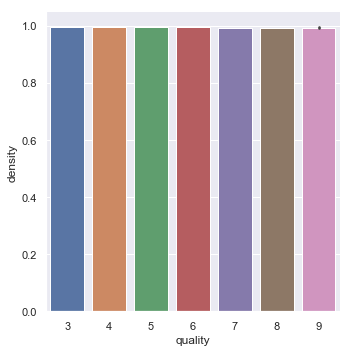

In [12]:
# Bivariate analysis of alochol,chlorides and density with the target variable

sns.catplot(data=data,x='quality',y='alcohol',kind='bar')
sns.catplot(data=data,x='quality',y='chlorides',kind='bar')
sns.catplot(data=data,x='quality',y='density',kind='bar')

In [13]:
# categorizing the quality as 'good' if it is >= 7

for i in range(len(data)):
    if data.loc[i,'quality']>=7:
        data.loc[i,'quality']='good'
    else:
        data.loc[i,'quality']='bad'

In [14]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,bad
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,good
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,bad
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,good
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,bad


In [15]:
# Convert the catgeorical variable quality to numerical ariable

from sklearn.preprocessing import LabelEncoder  

le=LabelEncoder()
data['quality']=le.fit_transform(data['quality'])
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,0
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,1
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,0
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,1
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,0


In [16]:
#Segregating the independent and dependent variable

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
#scaling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,-0.183684,-1.274580,0.385627,-0.921387,-0.405310,-0.893350,-1.265260,-1.179096,-0.653245,0.352943,0.712376
1,-0.183684,1.612530,-0.191173,-0.882228,-0.736509,0.330722,-0.800050,-1.331205,0.680061,1.141229,1.682436
2,-0.896467,-1.075469,-1.015174,-0.882228,2.102340,0.505589,-0.195277,-0.487994,-0.786576,-0.698106,-0.661876
3,-0.302481,1.114752,-0.932774,-0.471053,-0.357996,-1.068218,-0.939613,-1.271684,0.413400,0.352943,2.005789
4,-0.064887,0.417864,0.056027,-0.079458,0.209774,-1.767688,-0.218538,0.421351,0.013408,-0.785693,-1.146906
5,1.717070,0.019642,-0.520773,2.172212,-0.026797,0.738746,2.665765,2.021799,-1.119903,0.615705,-1.146906
6,-0.064887,-1.374135,0.138427,-0.960547,0.067831,0.272433,-0.497664,-0.964160,-0.786576,2.017102,0.469861
7,-0.658872,-0.677247,-0.191173,-1.019286,-0.121425,-0.310459,-0.497664,-0.808745,2.013368,1.666753,0.389023
8,-0.183684,0.318308,-2.086374,-0.999706,-0.357996,1.321637,0.200151,-0.603729,-0.053257,-0.260169,-0.419361
9,-1.134061,-0.079914,-0.355973,0.977848,-0.452624,-0.252170,-0.544185,0.289083,1.080053,-0.084994,-0.015169


In [18]:
# Create test and train data set

from sklearn.model_selection import train_test_split, KFold, cross_val_score

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Finding the best fitted model 

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [20]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)
    

LR: 80.087591 (0.015546)
KNN: 81.182084 (0.024918)
DT: 80.416589 (0.022239)
NB: 73.523557 (0.018888)
SVM: 81.802522 (0.016546)
RFC: 84.683212 (0.019783)


## Implementing the RainForest Classifier

In [21]:
# Since RFC is the best fitted model on train set

rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
rfc_pred = rfc.predict(test_X)

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rfc_score = accuracy_score(test_y, rfc_pred)*100

print('Accuracy score :%.2f ' % rfc_score)
print(confusion_matrix(test_y, rfc_pred))
print(classification_report(test_y, rfc_pred))

Accuracy score :86.39 
[[868  52]
 [108 148]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       920
           1       0.74      0.58      0.65       256

   micro avg       0.86      0.86      0.86      1176
   macro avg       0.81      0.76      0.78      1176
weighted avg       0.86      0.86      0.86      1176



AUC: 0.761


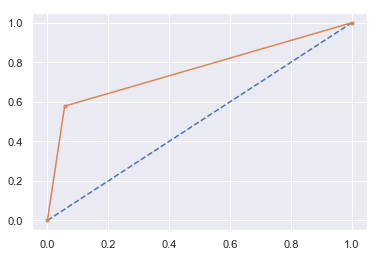

In [24]:
# calculate AUC
auc = roc_auc_score(test_y, rfc_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, rfc_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()